In [10]:
################################ARIMA#######################
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<ipython-input-11-182539deb204>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Date
2013-01-03    4327
2013-01-04    4486
2013-01-05    4997
2013-01-07    7176
2013-01-08    5580
Name: Sale, dtype: int64


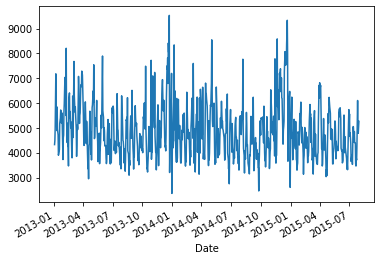

In [11]:
import os
import numpy as np
from pandas import read_csv, DataFrame
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def parser(x):
	return datetime.strptime(x, '%d/%m/%Y')

file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1Noise50_1000-1500.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = read_csv(os.path.basename(file), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(df.head())
df.plot()
pyplot.show()

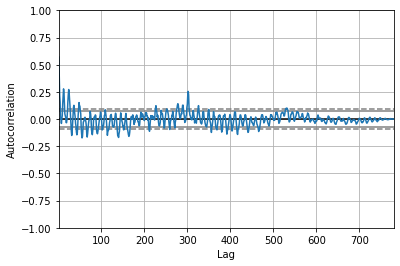

In [12]:
autocorrelation_plot(df)
pyplot.show()


C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                   Sale   No. Observations:                  780
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6430.782
Date:                Thu, 29 Apr 2021   AIC                          12873.564
Time:                        13:15:24   BIC                          12901.512
Sample:                             0   HQIC                         12884.313
                                - 780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3231      0.030    -10.696      0.000      -0.382      -0.264
ar.L2         -0.1992      0.044     -4.558      0.000      -0.285      -0.114
ar.L3         -0.1963      0.041     -4.752      0.0

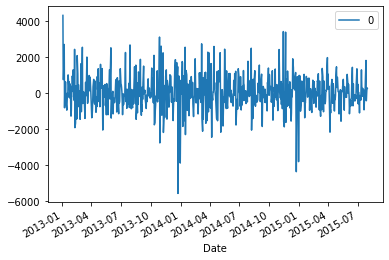

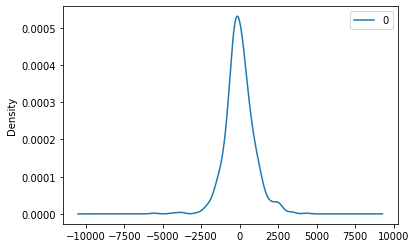

In [13]:
# fit model
model = ARIMA(df, order=(5,1,0))
# order=(p,d,q) p is number of lag observations, d is number of times raw observations are differnced, q is size of moving average window
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
from pandas import read_csv, DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [14]:
# split into train and test sets
X = df.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

In [15]:
#print(predictions)
out = np.array(predictions)
out.shape

(195,)

In [16]:
out = out.astype(int)
print(out)
np.savetxt("arima_pred_noise.csv", out,delimiter='\n', fmt="%i")
#yhat.to_csv(r'C:\Users\gurpr\Videos\BetaSci\arima_zero_noise.csv', index=False, header=True)

[6403 6448 5481 4786 5253 5114 5363 6522 7180 7246 7288 7314 7487 8162
 8885 8055 5244 6172 6574 6563 4578 4833 5256 5533 5601 4297 4436 3953
 4863 4904 4972 4519 4396 4227 5053 4146 3862 3736 3400 3891 4357 4560
 4493 4396 4725 5355 5186 5799 5011 4798 4791 4849 4947 4221 3681 3759
 3999 4449 4813 4184 4655 4272 4380 4765 4373 4018 4059 4002 4012 4611
 4818 5459 5279 5327 4753 5182 5001 4036 4299 4071 3615 3832 4738 5062
 4857 4080 4519 4271 4155 4000 3531 3757 3847 3960 4684 5887 5713 6314
 6317 6326 5134 4594 4280 3774 4588 4853 4654 4144 4188 4426 4681 4024
 3446 3439 3313 3356 4082 4847 4869 5316 5749 5537 5708 4900 5022 4888
 4742 5095 3877 3857 4087 4046 4489 4885 4927 4690 4098 4363 4427 4276
 4332 4012 4533 5182 5435 5295 5564 5324 4575 4484 4308 3920 3954 3788
 4069 5076 4692 4118 4565 4172 4267 4173 3757 3642 3606 3486 3832 4784
 5156 5053 5247 4729 4785 4737 3920 4146 3971 3910 3750 4597 4782 4589
 4573 4534 4549 4474 3966 3600 3942 3727 4273 5427 4830 4710 4984]


Test RMSE: 813.083


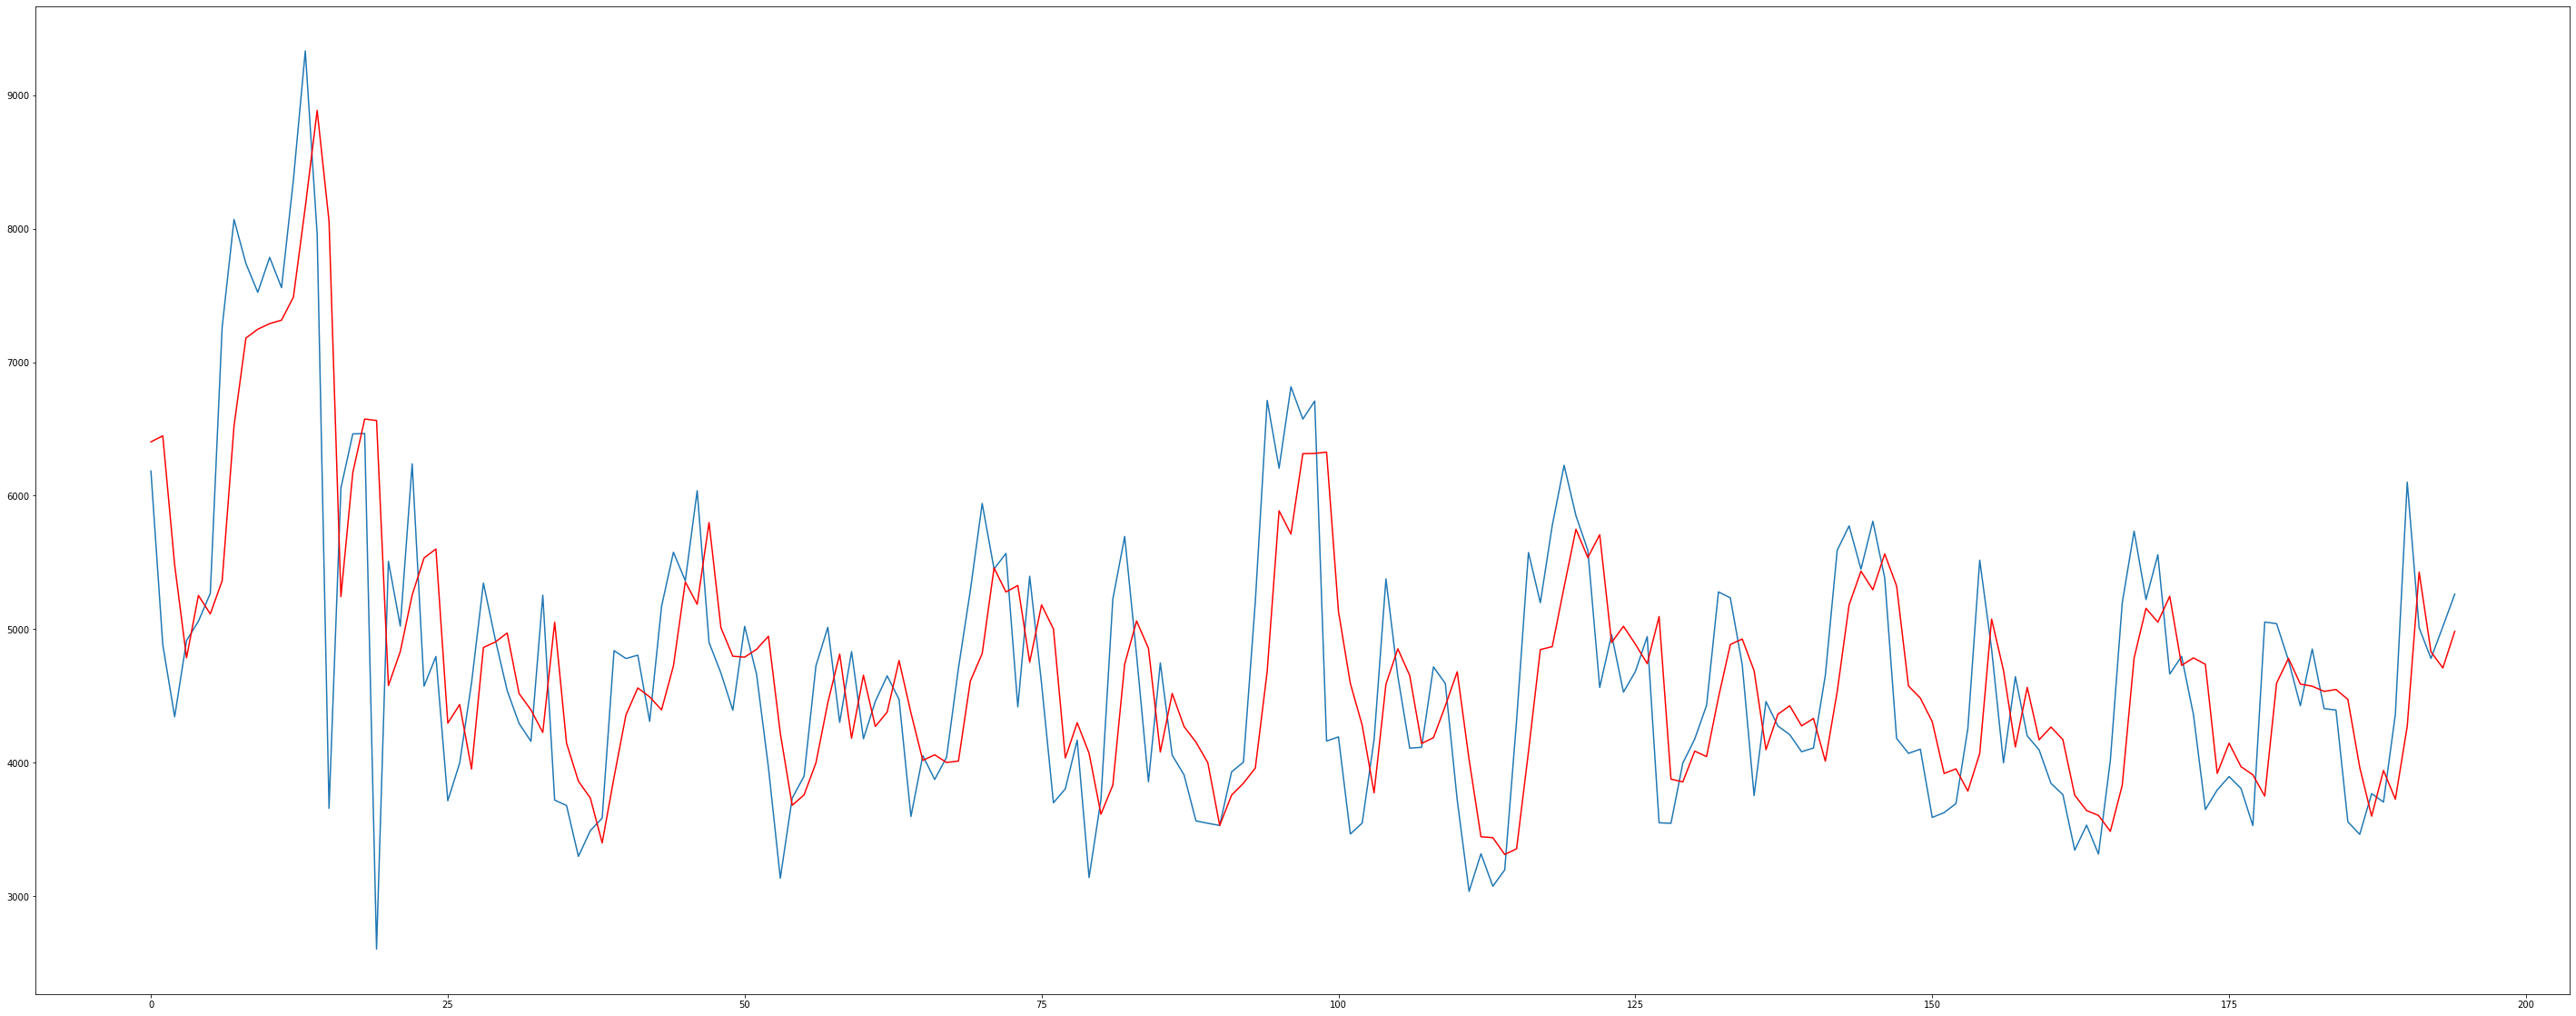

In [17]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize=(50,20))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.savefig('arima.png')
pyplot.show()

